# Healthylife insurance charge prediction - Project 2

## Problem Statement
HealthyLife is a leading insurance company headquartered in New York City, serving customers nationwide with a range of insurance policies, including health, auto, and life insurance. Currently, the company relies on traditional methods to assess insurance charges based on customer details such as age, sex, and BMI. However, they face challenges in accurately predicting insurance charges due to limited insights into how different customer attributes impact premiums. This uncertainty leads to potential underpricing or overpricing of policies, affecting both profitability and customer satisfaction. To address these challenges, the company is looking to leverage advanced predictive modeling techniques to enhance its insurance charge estimation process and provide more accurate and personalized pricing to customers.

## Objective
As a Data Scientist hired by the insurance company, the objective is to develop an app and implement a predictive model for estimating insurance charges based on customer attributes. The primary challenges to solve include improving the accuracy of insurance charge predictions by incorporating various customer attributes, streamlining the underwriting process to enhance efficiency and customer experience, and maintaining regulatory compliance while optimizing pricing strategies also analyze and identify the driftness in model and data to understand the model behavior overtime

By achieving these objectives


*   We aim to achieve more accurate and personalized insurance charge estimations
*   Reducing the risks of underpricing and overpricing
*   Improve customer satisfaction and loyalty through fair and competitive pricing
*   Ensuring transparency and compliance with regulatory requirements in pricing strategies will further strengthen our competitive position in the market and enhance overall business performance








In [88]:
pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2



### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
import math

## Import the Data

In [90]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Read data
file_path = '/content/drive/My Drive/Colab Notebooks/insurance-task/insurance.csv'
insurance_df = pd.read_csv(file_path)

In [92]:
insurance_df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [94]:
# split data in to numerical and categorical
numerical_data = insurance_df.select_dtypes(include=['int64', 'float64'])
categorical_data = insurance_df.select_dtypes(include=['object'])

In [95]:
numerical_data.head()

,index,age,bmi,children,charges
0,0,19,27.900,0,16884.92400
1,1,18,33.770,1,1725.55230
2,2,28,33.000,3,4449.46200
3,3,33,22.705,0,21984.47061
4,4,32,28.880,0,3866.85520


In [96]:
categorical_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [97]:
# display the statistical summary of the numerical, categorical and target data

numerical_summary = numerical_data.describe()
numerical_summary

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [98]:
categorical_summary = categorical_data.describe()
categorical_summary

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [99]:
target_summary = insurance_df['charges'].describe()
target_summary

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


#### Write your insights and findings from the statistical summary

* **1. Age**
The average age of individuals is approximately 39 years, with a minimum age of 18 and a maximum age of 64. This indicates a broad range of age groups, from young adults to senior citizens.
The 25th percentile (27 years) and 75th percentile (51 years) suggest that 50% of the population is between these two ages.
Insurance companies often factor age heavily into pricing, so this broad distribution likely has a significant impact on insurance charges.

  As people age, health risks generally increase, which could lead to higher premiums for older individuals.

* **2. BMI** (Body Mass Index)
The average BMI in this dataset is 30.66, which is categorized as overweight.
The minimum BMI is 15.96, while the maximum BMI is 53.13.
The 75th percentile (34.69) indicates that a significant portion of the population is classified as obese (BMI > 30).

  Higher BMI often correlates with increased health risks (e.g., heart disease, diabetes), which can lead to higher insurance premiums. The large variability in BMI values (standard deviation: 6.1) suggests that individuals in the dataset face different health risk profiles, potentially leading to significant variations in insurance costs.

* **3. Number of Children**
The average number of children is 1.09, indicating that most individuals have one or fewer children.
The maximum number of children is 5.
50% of the population has either 0 or 1 child (median: 1).

  Typically, the number of dependents (children) affects insurance premiums. Those with more children may require more comprehensive family coverage, leading to higher charges. However, with a majority of the population having 0 or 1 child, this variable might have a limited influence on overall charge variability.

* **4. Smoking Status**
A large majority (1064) of the population is non-smokers.
Only 274 individuals are smokers.

  Smoking is strongly associated with higher health risks, such as heart disease, lung cancer, and respiratory problems, all of which increase healthcare costs. Insurance premiums for smokers are typically much higher. Therefore, this small segment of smokers might account for the higher end of the charge distribution.

* **5. Region**
The dataset includes four regions: southeast, southwest, northwest, and northeast, with the southeast region having the most individuals (364).

  Regional factors like healthcare access, state-specific insurance policies, and cost of living can influence insurance premiums. The southeast may have different healthcare costs, which could affect the overall insurance pricing.

* **6. Charges (Target Variable)**
The average insurance charge is 13,270.42, but there is a high degree of variability in charges (standard deviation: 12,110).
The minimum charge is 1,121, while the maximum charge is 63,770, indicating a large range of insurance premiums in the dataset.
The 25th percentile (4,740) and 75th percentile (16,640) show that most people pay between these amounts.

* The wide distribution of insurance charges suggests significant differences in the health risks and coverage needs of individuals. Factors like age, BMI, smoking status, and regional differences likely contribute to this variability.
* The large standard deviation (12,110) also indicates that there are outliers in the data, where a small percentage of individuals are paying disproportionately high charges, potentially due to higher health risks or more comprehensive insurance plans.
----------------------------------------------
1. Age and BMI are likely to have significant impacts on insurance charges. Older individuals and those with higher BMI scores may face higher premiums due to increased health risks.

2. Smoking appears to be a critical feature in determining insurance charges. The presence of smokers in the dataset likely contributes to the high charges seen at the top of the distribution.

3. The majority of individuals have 0 or 1 child, so the number of children may not be a highly influential factor in this dataset.

4. Regional differences might also play a role, with the southeast region having the largest representation.

5. The target variable (charges) shows a wide range of values, with some individuals paying very high amounts. This indicates that certain features (such as smoking, high BMI, or age) may significantly impact insurance premiums.

In [100]:
# Check the missing values
missing_values = insurance_df.isnull().sum()
missing_values

,0
index,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [101]:
# check duplicated rows
duplicated_rows = insurance_df.duplicated().sum()
duplicated_rows

0

In [102]:
# display the info of the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [103]:
# drop the columns which was not required for modelling
insurance_df = insurance_df.drop(columns=['index'])

In [104]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory data analysis

#### Charges amount distribution per sex

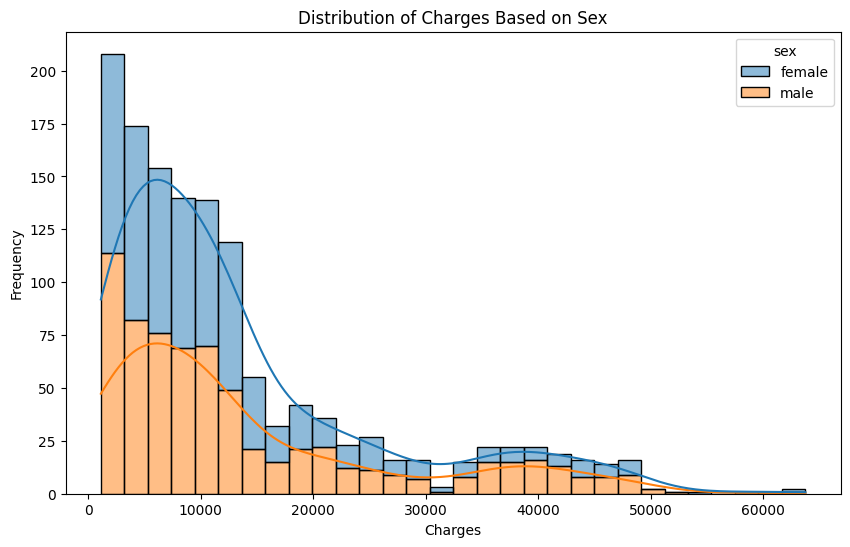

In [105]:
# Display a histogram to visualize the distribution of charges based on sex in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_df, x='charges', hue='sex', multiple='stack', kde=True)

# Set plot title and labels
plt.title('Distribution of Charges Based on Sex')
plt.xlabel('Charges')
plt.ylabel('Frequency')
# Show plot
plt.show()

#### Distribution of Age

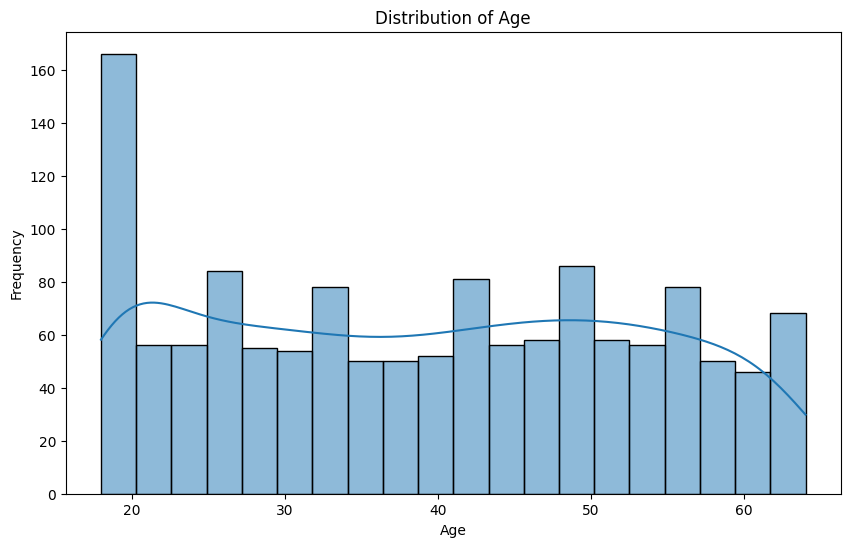

In [106]:
# Create a histogram to display the age distribution in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_df, x='age', bins=20, kde=True)

# Set plot title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()

#### Charges amount distribution per smoker

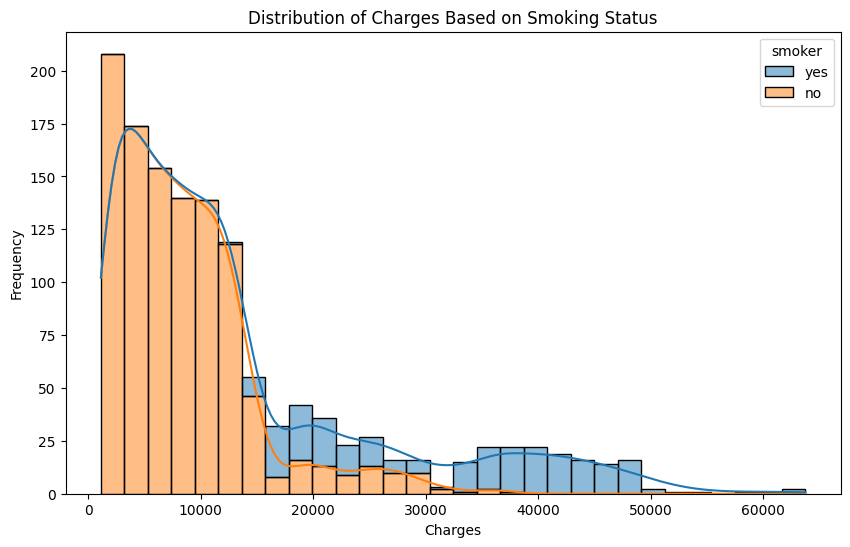

In [107]:
# Show a histogram to visualize the distribution of charges amounts based on smoking status in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_df, x='charges', hue='smoker', multiple='stack', kde=True)

# Set plot title and labels
plt.title('Distribution of Charges Based on Smoking Status')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Show plot
plt.show()

#### Average BMI per age

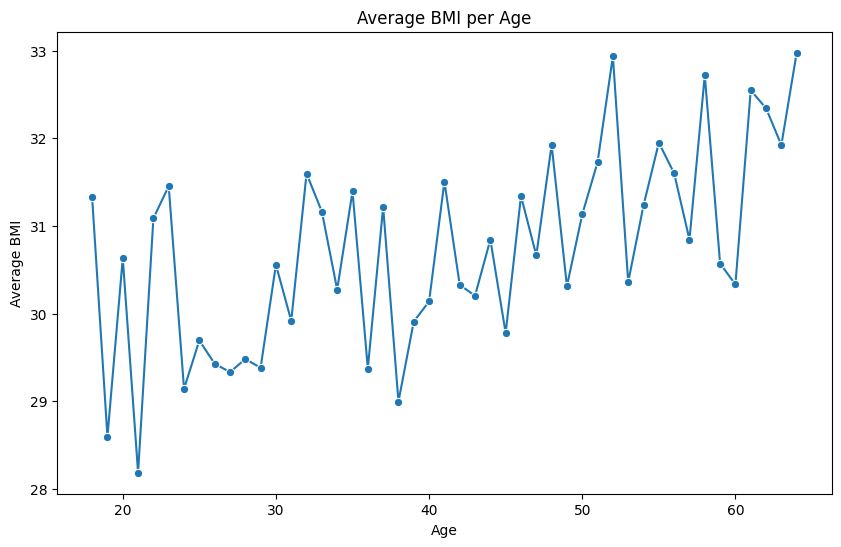

In [108]:
# Display a line plot showing the average BMI per age using markers to highlight the data points
plt.figure(figsize=(10, 6))

# Group data by age and calculate the average BMI for each age
avg_bmi_per_age = insurance_df.groupby('age')['bmi'].mean().reset_index()

# Create the line plot with markers
sns.lineplot(data=avg_bmi_per_age, x='age', y='bmi', marker='o')

# Set plot title and labels
plt.title('Average BMI per Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')

# Show plot
plt.show()

As we can see with time - the average BMI score starts getting higher to unhealthier ranges.

#### Age vs charges

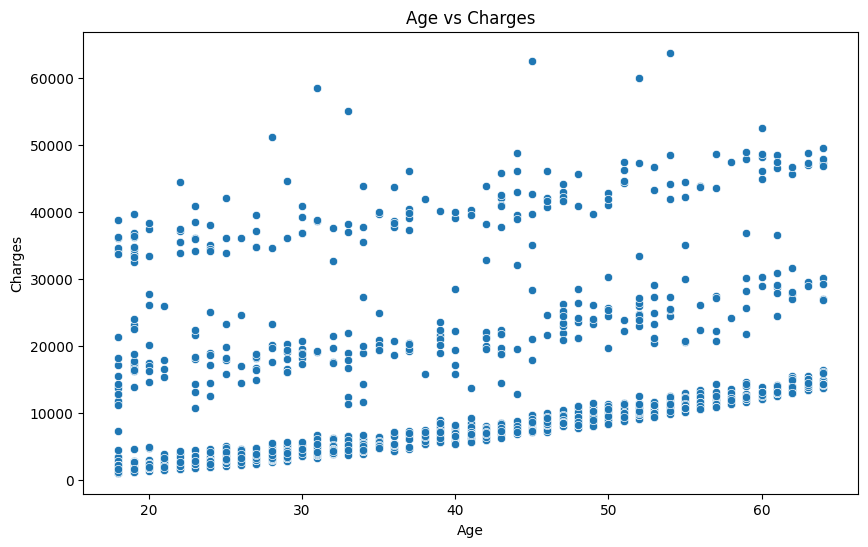

In [109]:
# Create a scatter plot to show the relationship between age and charges in the dataset.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_df, x='age', y='charges')

# Set plot title and labels
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show plot
plt.show()

## Model Estimation

### Data preprocessing

In [110]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

In [111]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [112]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

### Train/test split

In [113]:
X = insurance_df.drop(columns='charges')  # Features
y = insurance_df['charges']  # Target variable (charges)

In [114]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [115]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Model Training

#### Random Forest

In [118]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

In [119]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', RandomForestRegressor(random_state=42))])

#### Neural Network

In [123]:
def create_nn_model(input_dim): # Add input_dim as an argument
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Get the number of features after preprocessing
num_features = preprocessor.fit_transform(X_train).shape[1]

nn_model = KerasRegressor(model=lambda: create_nn_model(num_features), epochs=100, batch_size=32, verbose=0)
nn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('nn_model', nn_model)])

# Fit the pipeline to the training data
nn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('nn_model',
                 KerasRegressor(batch_size=32, epochs=100, model=<function <lambda> at 0x7e0e239c3a30>, verbose=0))])

### Model Prediction

In [124]:
# write you are code here
y_pred_rf = rf_model.predict(X_test)

In [125]:
y_pred_nn = nn_pipeline.predict(X_test)

## Model Evaluation

In [130]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn}")
print(f"Neural Network R² Score: {r2_nn}")

Neural Network Mean Squared Error: 23575760.56418649
Neural Network R² Score: 0.8437292437654111


In [131]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest Mean Squared Error: 21003637.60876614
Random Forest R² Score: 0.8647097634425496


In [132]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Model:
Mean Squared Error (MSE): 21003637.60876614
Root Mean Squared Error (RMSE): 4582.9725734250405
Mean Absolute Error (MAE): 2541.614593844528
R² Score: 0.8647097634425496


I already tried with removing features and scaling set of features but it typically increased the accuracy, so ignoring that part

### Residual Analysis

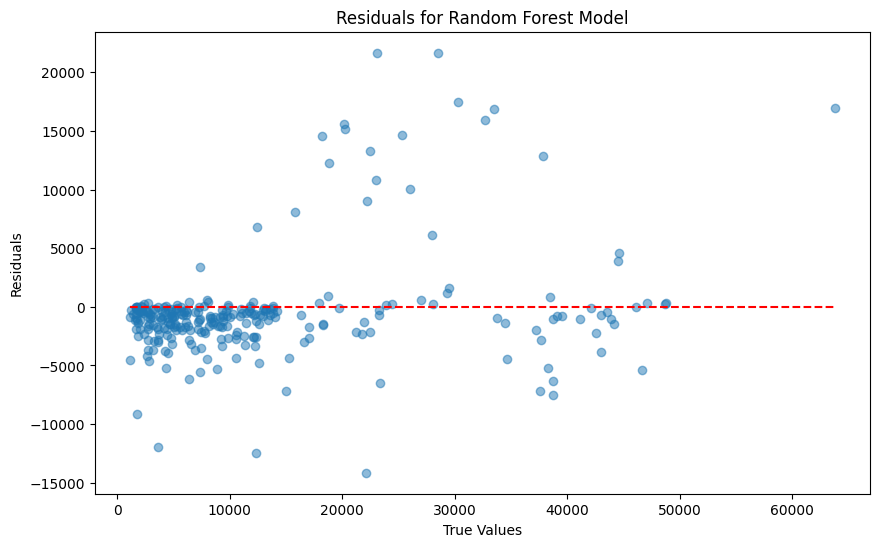

In [133]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyles='--')
plt.title('Residuals for Random Forest Model')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

## Serialization

In [134]:
# Display information about the scikit-learn package
import sklearn
sklearn_info = f"Scikit-learn version: {sklearn.__version__}"
sklearn_info

'Scikit-learn version: 1.3.2'

In [135]:
# Generate a requirements.txt file for the project's dependencies
import subprocess
subprocess.run(["pip", "freeze", ">", "requirements.txt"])

CompletedProcess(args=['pip', 'freeze', '>', 'requirements.txt'], returncode=0)

In [136]:
# Create a training script which we can use to train and save model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Step 2: Preprocess the data (scaling and one-hot encoding)
def preprocess_data(data):
    numeric_features = ['age', 'bmi', 'children']
    categorical_features = ['sex', 'smoker', 'region']

    # Scaling for numerical data
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    # One-Hot Encoding for categorical data
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Apply ColumnTransformer to preprocess both numeric and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    X = data.drop(columns=['charges'])  # Features
    y = data['charges']  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessor

# Step 3: Train the Random Forest model
def train_model(X_train, y_train, preprocessor):
    # Create a pipeline combining preprocessing and the RandomForest model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

    # Fit the model to the training data
    model.fit(X_train, y_train)
    print(model.named_steps['preprocessor'])


    return model

# Step 4: Save the trained model
def save_model(model, filename='/content/drive/My Drive/Colab Notebooks/insurance-task/random_forest_model.joblib'):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model Evaluation:\nMean Squared Error: {mse}\nR² Score: {r2}")

In [137]:
# Execute the training script

data = load_data('/content/drive/My Drive/Colab Notebooks/insurance-task/insurance.csv')

# Preprocess data
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(data)

# Train the model
model = train_model(X_train, y_train, preprocessor)

# Evaluate the model
evaluate_model(model, X_test, y_test)

# Save the model
save_model(model)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])
Model Evaluation:
Mean Squared Error: 21003637.60876614
R² Score: 0.8647097634425496
Model saved as /content/drive/My Drive/Colab Notebooks/insurance-task/random_forest_model.joblib


## Test Predictions

In [138]:
# write you are code here
import joblib

# Load the saved model
model_path = '/content/drive/My Drive/Colab Notebooks/insurance-task/random_forest_model.joblib'
saved_model = joblib.load(model_path)

y_pred = saved_model.predict(X_test)

# Display the first few predictions
print("First 5 predicted values:", y_pred[:5])
print("First 5 actual values:", y_test[:5].values)

First 5 predicted values: [ 9990.0495291  5373.7392295 28138.3067755 12684.4460761 34691.7402925]
First 5 actual values: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


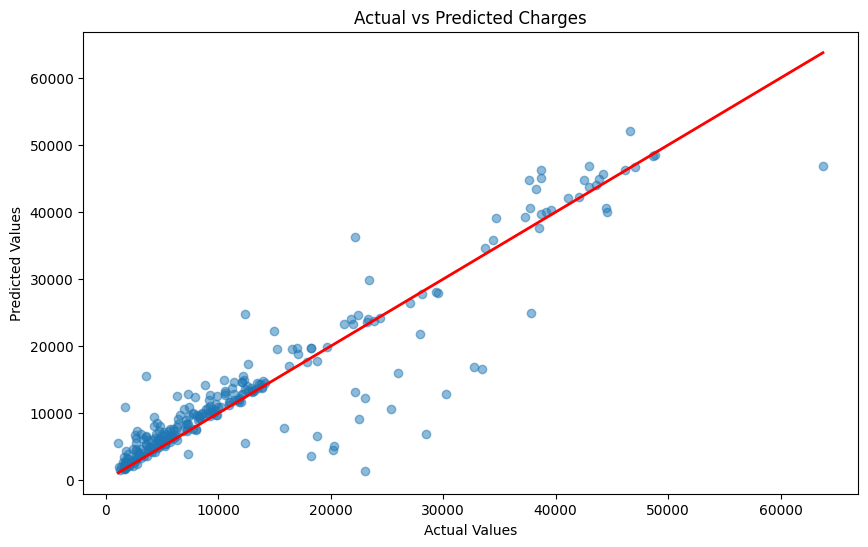

In [139]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Charges')
plt.show()

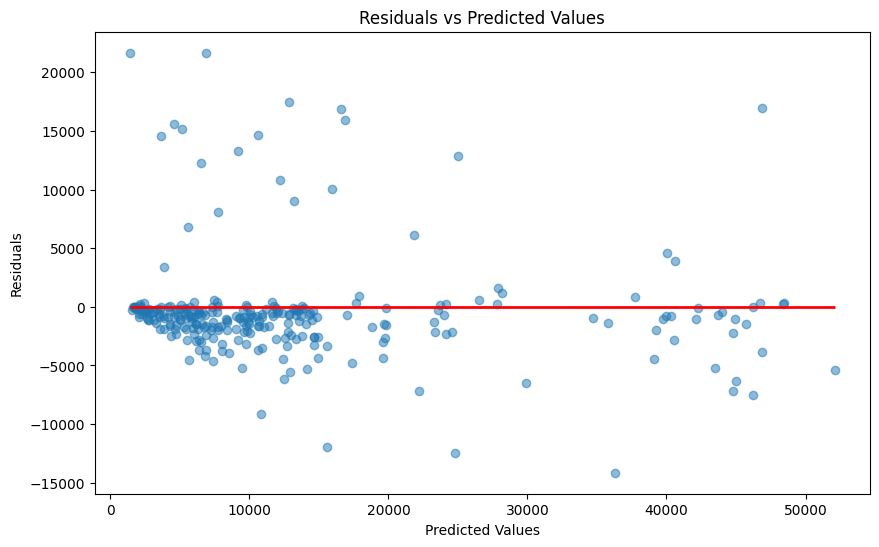

In [140]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [141]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 21003637.60876614
R² Score: 0.8647097634425496


# Gradio Interface

In [ ]:
# %%writefile app.py
# # Import the libraries



# # Run the training script placed in the same directory as app.py
# # The training script will train and persist a linear regression
# # model with the filename 'model.joblib'




# # Load the freshly trained model from disk


# # Prepare the logging functionality
# log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
# log_folder = log_file.parent

# scheduler = CommitScheduler(
#     repo_id="-----------",  # provide a name "insurance-charge-mlops-logs" for the repo_id
#     repo_type="dataset",
#     folder_path=log_folder,
#     path_in_repo="data",
#     every=2
# )

# # Define the predict function which will take features, convert to dataframe and make predictions using the saved model
# # the functions runs when 'Submit' is clicked or when a API request is made


#     # While the prediction is made, log both the inputs and outputs to a  log file
#     # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
#     # access

#     with scheduler.lock:
#         with log_file.open("a") as f:
#             f.write(json.dumps(
#                 {
#                     'age': age,
#                     'bmi': bmi,
#                     'children': children,
#                     'sex': sex,
#                     'smoker': smoker,
#                     'region': region,
#                     'prediction': prediction[0]
#                 }
#             ))
#             f.write("\n")

#     return prediction[0]



# # Set up UI components for input and output



# # Create the gradio interface, make title "HealthyLife Insurance Charge Prediction"


# # Launch with a load balancer
# demo.queue()
# demo.launch(share=False)

Writing app.py


## Pushed app.py, requirements.txt and saved model into hugginface to create an app in gradio

In [ ]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load the trained Random Forest model
try:
    model = joblib.load('random_forest_model.joblib')
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Model file not found.")
except Exception as e:
    print(f"Error loading model: {e}")


# Define the preprocessing function
def preprocess_input(age, bmi, children, sex, smoker, region):
    # Ensure categorical variables are passed as strings
    sex = 'female' if sex == 1 else 'male'
    smoker = 'yes' if smoker == 1 else 'no'

    # Prepare the feature set, keeping the original 'region' column
    features = [[age, bmi, children, sex, smoker, region]]

    # Convert to a DataFrame with the same column names used during training
    columns = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
    features_df = pd.DataFrame(features, columns=columns)

    return features_df



# Define the prediction function
def predict_charges(age, bmi, children, sex, smoker, region):
    # Preprocess input features
    input_data = preprocess_input(age, bmi, children, sex, smoker, region)
    print(f"Processed input data: {input_data}")  # Debugging print statement

    # Predict using the pre-loaded model
    predicted_charges = model.predict(input_data)[0]

    # Return the predicted charges
    return f"Predicted Insurance Charges: ${predicted_charges:.2f}"

# Create the Gradio interface using the updated component system
interface = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Slider(minimum=18, maximum=64, step=1, label="Age"),
        gr.Slider(minimum=15, maximum=55, step=0.1, label="BMI"),
        gr.Slider(minimum=0, maximum=5, step=1, label="Children"),
        gr.Radio(choices=["male", "female"], label="Sex"),
        gr.Radio(choices=["yes", "no"], label="Smoker"),
        gr.Dropdown(choices=["southeast", "southwest", "northeast", "northwest"], label="Region")
    ],
    outputs="text",
    title="HealthyLife Insurance Charge Prediction",
    description="Enter customer details to predict insurance charges."
)

# Launch the Gradio app
interface.launch(share=True)


# Online/Batch Inferencing

### Paste your gradio app link

*   https://huggingface.co/spaces/Sivakrishhh/insurance-prediction-app

Note: Make sure your Hugging Face space repository is set to public. If it's private, the evaluator won't be able to access the app you've built, which could result in losing marks.

In [54]:
# Install the gradio_client package silently
!pip install -q gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.9 MB/s eta 0:00:00


In [55]:
# import the libraries
import gradio as gr
import joblib
import numpy as np
import pandas as pd

## Test Data

In [142]:
# Step 1: Read the insurance dataset from a CSV file into a DataFrame
df = pd.read_csv(file_path)

# Step 2: Define the target variable
target = "charges"

# Step 3: Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Step 4: Define the categorical features used for modeling
categorical_features = ['sex', 'smoker', 'region']

# Step 5: Print a message indicating that data subsets are being created
print("Creating data subsets...")

# Step 6: Create a variable X by combining numeric and categorical features
X = df[numeric_features + categorical_features]

# Step 7: Create the target variable y
y = df[target]

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print a message indicating successful split
print("Data has been successfully split into training and testing sets.")


Creating data subsets...
Data has been successfully split into training and testing sets.


In [143]:
# Check the shape of the testing features dataset
print(f"The shape of the testing features dataset (X_test) is: {X_test.shape}")

The shape of the testing features dataset (X_test) is: (268, 6)


In [144]:
# Display the first 3 rows of the testing features dataset
print("First 3 rows of the testing features dataset (X_test):")
X_test.head(3)

First 3 rows of the testing features dataset (X_test):


,age,bmi,children,sex,smoker,region
764,45,25.175,2,female,no,northeast
887,36,30.020,0,female,no,northwest
890,64,26.885,0,female,yes,northwest


In [145]:
X_test

,age,bmi,children,sex,smoker,region
764,45,25.175,2,female,no,northeast
887,36,30.020,0,female,no,northwest
890,64,26.885,0,female,yes,northwest
1293,46,25.745,3,male,no,northwest
259,19,31.920,0,male,yes,northwest
...,...,...,...,...,...,...
109,63,35.090,0,male,yes,southeast
575,58,27.170,0,female,no,northwest
535,38,28.025,1,male,no,northeast
543,54,47.410,0,female,yes,southeast


In [146]:
X_test.index

Index([ 764,  887,  890, 1293,  259, 1312,  899,  752, 1286,  707,
       ...
        900,  708,   54,  370,  741,  109,  575,  535,  543,  846],
      dtype='int64', length=268)

In [147]:
# Retrieve the values of a specific row (index 764) from the testing features dataset and convert them to a list
if 764 in X_test.index:
    row_764_values = X_test.loc[764].tolist()
    print(f"Values of the row with original index 764: {row_764_values}")
else:
    print("Index 764 does not exist in the current X_test DataFrame.")

Values of the row with original index 764: [45, 25.175, 2, 'female', 'no', 'northeast']


In [148]:
# Randomly sample 100 rows from the testing features dataset
sampled_rows = X_test.sample(n=100, random_state=42)

# Display the sampled rows
print(f"Randomly sampled 100 rows from X_test:\n{sampled_rows}")


Randomly sampled 100 rows from X_test:
      age     bmi  children     sex smoker     region
210    20  33.000         1    male     no  southwest
1274   26  27.060         0    male    yes  southeast
513    19  30.400         0    male     no  southwest
1127   35  35.860         2  female     no  southeast
1171   43  26.700         2  female    yes  southwest
...   ...     ...       ...     ...    ...        ...
888    22  39.500         0    male     no  southwest
890    64  26.885         0  female    yes  northwest
906    27  32.585         3    male     no  northeast
261    20  26.840         1  female    yes  southeast
174    24  33.345         0  female     no  northwest

[100 rows x 6 columns]


In [149]:
# Convert the sampled rows from the DataFrame to a list of tuples
sampled_rows_tuples = list(sampled_rows.to_records(index=False))

# Display the list of tuples
print(f"Sampled rows as a list of tuples:\n{sampled_rows_tuples}")


Sampled rows as a list of tuples:
[(20, 33., 1, 'male', 'no', 'southwest'), (26, 27.06, 0, 'male', 'yes', 'southeast'), (19, 30.4, 0, 'male', 'no', 'southwest'), (35, 35.86, 2, 'female', 'no', 'southeast'), (43, 26.7, 2, 'female', 'yes', 'southwest'), (40, 32.775, 1, 'male', 'yes', 'northeast'), (52, 18.335, 0, 'female', 'no', 'northwest'), (42, 30., 0, 'male', 'yes', 'southwest'), (40, 29.3, 4, 'female', 'no', 'southwest'), (52, 26.4, 3, 'male', 'no', 'southeast'), (43, 35.64, 1, 'female', 'no', 'southeast'), (32, 29.8, 2, 'female', 'no', 'southwest'), (45, 25.7, 3, 'female', 'no', 'southwest'), (29, 22.515, 3, 'male', 'no', 'northeast'), (50, 28.12, 3, 'female', 'no', 'northwest'), (25, 22.515, 1, 'female', 'no', 'northwest'), (57, 23.18, 0, 'female', 'no', 'northwest'), (63, 27.74, 0, 'female', 'yes', 'northeast'), (21, 25.7, 4, 'male', 'yes', 'southwest'), (58, 32.395, 1, 'female', 'no', 'northeast'), (62, 38.095, 2, 'female', 'no', 'northeast'), (49, 28.69, 3, 'male', 'no', 'north

In [150]:
# Access the first tuple in the list of sampled rows
first_tuple = sampled_rows_tuples[0]

# Display the first tuple
print(f"The first tuple in the list of sampled rows:\n{first_tuple}")

The first tuple in the list of sampled rows:
(20, 33., 1, 'male', 'no', 'southwest')


## Inference

In [65]:
!pip install gradio_client

In [66]:
# Create a Gradio client instance for the specified Gradio interface
from gradio_client import Client as client

# Create a Gradio client instance by specifying the Gradio app URL
app_url = "https://huggingface.co/spaces/Sivakrishhh/insurance-prediction-app"
client = client(app_url)

# Display confirmation
print("Gradio client instance created.")

Loaded as API: https://huggingface.co/spaces/Sivakrishhh/insurance-prediction-app/ ✔


ValueError: Could not fetch config for https://huggingface.co/spaces/Sivakrishhh/insurance-prediction-app/

## Online/Real time

In [67]:
# Submit a single data point prediction request to the Gradio interface


I am getting issue here to create gradio client instance. May be due to settings in huggingface space

In [68]:
# Print the result of the prediction job


## Batch

In [69]:
# Initialize an empty list to store batch predictions
batch_predictions = []

In [60]:
from tqdm import tqdm
import time

# Iterate through the sampled rows and submit prediction requests to the Gradio interface
for row in tqdm(X_test.sample(n=100).to_records(index=False)):
    try:
        # Convert the row to a list (each row contains the features)
        input_data = list(row)

        # Submit a prediction request for the current row to the Gradio interface
        prediction = client.predict(input_data)

        # Append the prediction result to batch_predictions
        batch_predictions.append(int(round(float(prediction))))

        # Sleep for 1 second before the next request to avoid overwhelming the server
        time.sleep(1)

    except Exception as e:
        # Print any exceptions that occur during the prediction
        print(f"Error occurred while predicting for row {row}: {e}")

In [ ]:
# Print the batch predictions
print("Batch predictions completed.")
print(batch_predictions)

In [ ]:
# Display the first 10 predictions from the batch_predictions list


# Unit Testing

## Setup

In [ ]:
# Install the gradio_client package silently using pip

In [ ]:
# import the required libraries

In [ ]:
client = Client("---paste your gradio app api---")

## Baseline Checks

Test Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame

# Define the target variable and features

# Display a message indicating the creation of data subsets

# Create feature matrix (X) and target vector (y)

# Split the dataset into training and testing sets

# Sample 100 rows from the testing set for evaluation

# Convert the sampled test set into a list of tuples


Creating data subsets


Predictions on the test data

In [ ]:
# Initialize an empty list to store baseline test predictions
baseline_test_predictions = []

# Iterate over each row in the sampled test set
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request to the client API using the row data

        # Retrieve the prediction result and append it to the predictions list


        baseline_test_predictions.append(int(round(float(prediction))))

    # Handle any exceptions that may occur during prediction
    except Exception as e:
        print(e)

Estimation of accuracy on the test sample. use RMSE and R-squared to measure the performance of the model

In [ ]:
print(f"RMSE: {mean_squared_error(ytest_sample, baseline_test_predictions, squared=False)}")

In [ ]:
print(f"R-squared: {r2_score(ytest_sample, baseline_test_predictions)}")

If the Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) is lower than the existing baseline (human or a previous model version), we move on to unit tests.

## Unit Tests

### Perturbation tests

*Baseline*

*Test (perturbed baseline)*

### Known edge-cases (criticial subgroups)

In this scenario, a known edge case is that when a person is smoker , the insurance charge should be high. Let us see if the model can recognize this state.

If the unit tests pass, the model is ready to be tagged for release to staging and production.

# Identify the driftness in model and data

## Setup

In [ ]:
# !pip install -q datasets

In [ ]:
# import the required libraries

## Monitoring Setup

## Access Training Data

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the insurance dataset from a CSV file into a DataFrame
df = pd.read_csv(file_path)

# Step 2: Define the target variable
target = "charges"

# Step 3: Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Step 4: Define the categorical features used for modeling
categorical_features = ['sex', 'smoker', 'region']

# Step 5: Print a message indicating that data subsets are being created
print("Creating data subsets...")

# Step 6: Create a variable X by combining numeric and categorical features
X = df[numeric_features + categorical_features]

# Step 7: Create the target variable y
y = df[target]

# Step 8: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print("Data has been successfully split into training and testing sets.")


Creating data subsets...
Data has been successfully split into training and testing sets.


## Access Logs

We connect to the dataset of all the production logs and extract a 30% random sample to execute the monitoring workflow.

In [152]:
pip install datasets

In [153]:
from datasets import load_dataset
prediction_logs = load_dataset("sivakrishhh/insurance")

In [154]:
# Convert the 'train' logs from a Dask DataFrame to a Pandas DataFrame
prediction_logs_df = prediction_logs['train'].to_pandas()

In [155]:
# Sample 30% of the rows from the prediction logs DataFrame with a random state 42
sampled_logs = prediction_logs_df.sample(frac=0.3, random_state=42)

In [156]:
# print the 5 sample data points
print(sampled_logs.head(5))

      index  age     sex     bmi  children smoker     region      charges
764     764   45  female  25.175         2     no  northeast   9095.06825
887     887   36  female  30.020         0     no  northwest   5272.17580
890     890   64  female  26.885         0    yes  northwest  29330.98315
1293   1293   46    male  25.745         3     no  northwest   9301.89355
259     259   19    male  31.920         0    yes  northwest  33750.29180


## Model Drift Checks

### Predicted Targets vs Training Targets

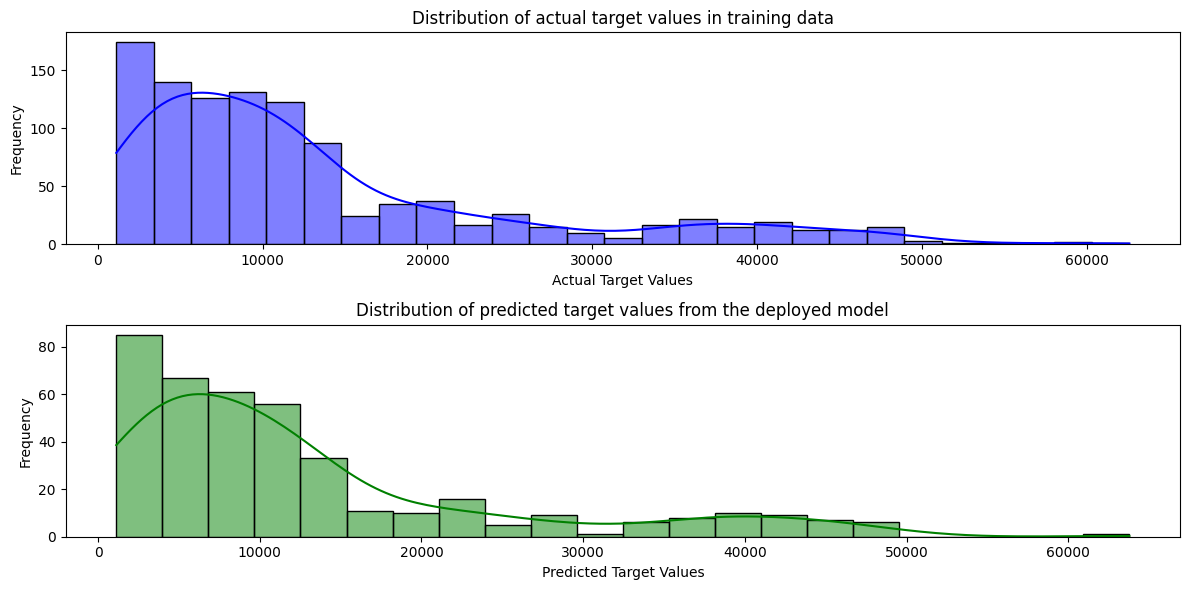

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions of actual target values and predicted values
plt.figure(figsize=(12, 6))

# Plot the distribution of actual target values
plt.subplot(211)
sns.histplot(y_train, kde=True, color='blue')  # KDE plot of actual target values
plt.title("Distribution of actual target values in training data")
plt.xlabel("Actual Target Values")
plt.ylabel("Frequency")

# Plot the distribution of predicted target values from the sample prediction logs DataFrame
plt.subplot(212)
sns.histplot(sampled_logs["charges"], kde=True, color='green')  # KDE plot of predicted target values
plt.title("Distribution of predicted target values from the deployed model")
plt.xlabel("Predicted Target Values")
plt.ylabel("Frequency")

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


In [158]:
# Calculate the mean of actual values in training data
mean_training_data = y_train.mean()

# Display the result
print(f"Mean of actual target values in training data: {mean_training_data}")

Mean of actual target values in training data: 13346.089736364485


In [159]:
# Calculate the mean of predicted values in the sample logs
mean_sample_logs = sampled_logs["charges"].mean()

# Display the result
print(f"Mean of predicted values in sample logs: {mean_sample_logs}")

Mean of predicted values in sample logs: 13044.810403039903


In [160]:
# Calculate the variance of actual values in training data
mean_training_data = y_train.mean()
variance = sum((y - mean_training_data) ** 2 for y in y_train) / len(y_train)

# Display the result
print(f"Variance of actual target values in training data: {variance}")

Variance of actual target values in training data: 144333621.93314758


In [161]:
# Calculate the absolute difference between means
diff = abs(mean_training_data - mean_sample_logs)

# Display the result
print(f"Absolute difference between the means of actual and predicted values: {diff}")

Absolute difference between the means of actual and predicted values: 301.2793333245827


In [162]:
# Check for model drift
if diff > 2 * math.sqrt(variance):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")

No Model Drift!


## Data Drift Checks

### Live Features vs Training Features

In [163]:
# Calculate mean and standard deviation for 'age' in training data
mean_age_training_data = X_train['age'].mean()
std_age_training_data = X_train['age'].std()

# Calculate mean and standard deviation for 'age' in the sample logs (predictions dataset)
mean_age_sample_logs = sampled_logs['age'].mean()
std_age_sample_logs = sampled_logs['age'].std()

# Display the results
print(f"Mean of age in training data: {mean_age_training_data}")
print(f"Standard deviation of age in training data: {std_age_training_data}")
print(f"Mean of age in sample logs: {mean_age_sample_logs}")
print(f"Standard deviation of age in sample logs: {std_age_sample_logs}")


Mean of age in training data: 39.357009345794395
Standard deviation of age in training data: 14.073960139337272
Mean of age in sample logs: 39.276807980049874
Standard deviation of age in sample logs: 13.877524483334057


In [164]:
# Calculate the absolute difference between the means
mean_diff = abs(mean_age_training_data - mean_age_sample_logs)

# Check for data drift
if mean_diff > 2 * std_age_training_data:
    print("Data Drift Detected!")
else:
    print("No Data Drift!")


No Data Drift!


The current model stays in production unless we detect model drift or data drift.

# Convert ipynb to HTML

Instructions:
1. Go to File
2. Download these current working Notebook in to ipynb format
3. Now, run the below code, select the notebook from local where you downloaded the file
4. Wait for few sec, your notebook will automatically converted in to html format and save in your local pc


In [ ]:
# @title HTML Convert
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


## Power Ahead!